# LIVER DISEASE DETECTION
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### DataSet
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.
Any patient whose age exceeded 89 is listed as being of age "90".

### Features:
* Age of the patient
* Gender of the patient
* Total Bilirubin
* Direct Bilirubin
* Alkaline Phosphotase
* Alamine Aminotransferase
* Aspartate Aminotransferase
* Total Protiens
* Albumin
* Albumin and Globulin Ratio
* Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

###  Type of Machine Learning Problem

It is a binary classification problem, where given the above set of features, we need to predict if a given patient has liver disease or not

In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
#from sklearn.externals import joblib
import sklearn as sk
!pip install -U seaborn

In [2]:
df=pd.read_csv('indian_liver_patient.csv')

In [3]:
df.shape

(583, 11)

In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

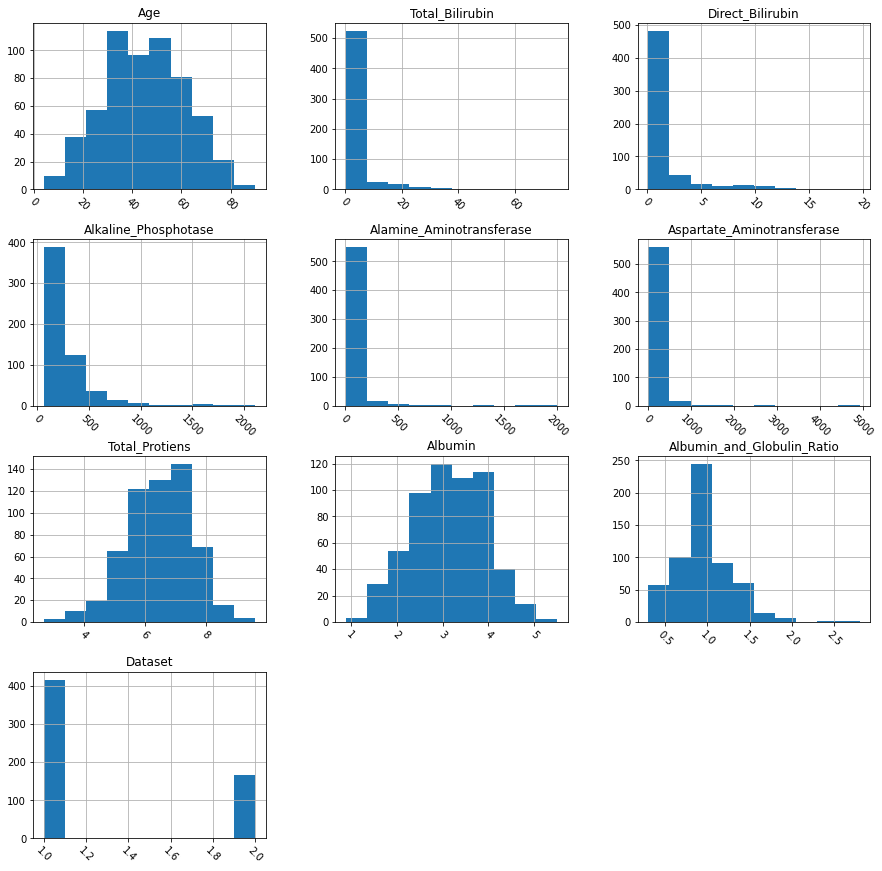

In [7]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [8]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

In [10]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [11]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


<Axes: xlabel='count', ylabel='Gender'>

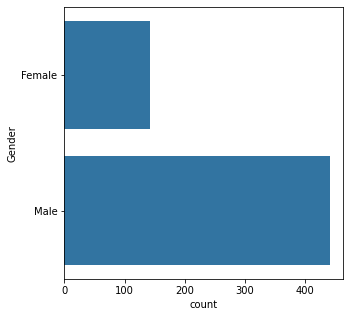

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [13]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


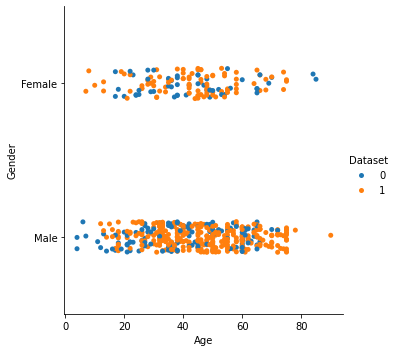

In [14]:
sns.catplot (x="Age", y="Gender", hue="Dataset", data=df)

Number of patients that are male:  441
Number of patients that are female:  142


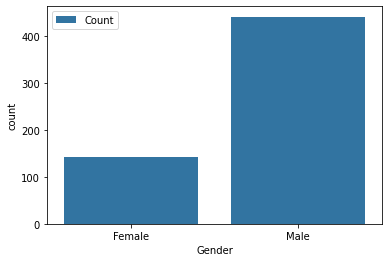

In [15]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [16]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

In [17]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

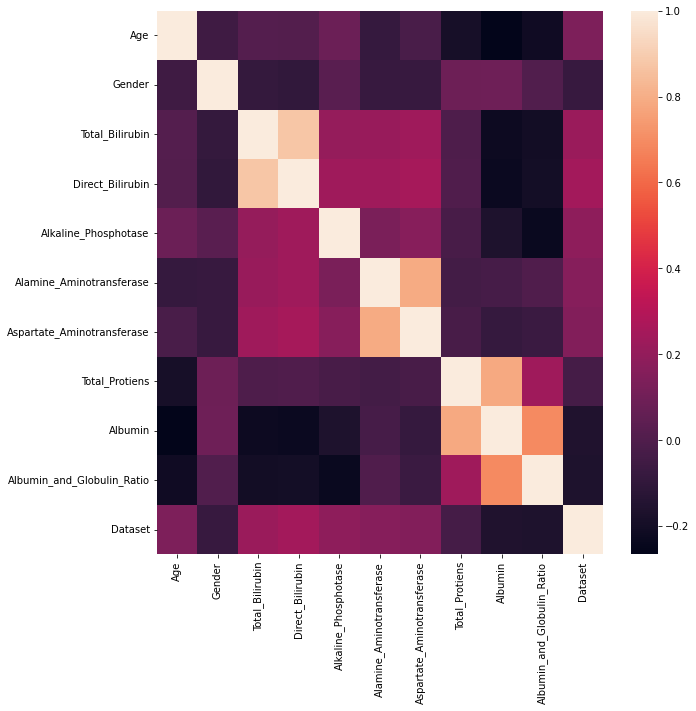

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [19]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


In [20]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [21]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

In [22]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [23]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [24]:
df.isnull().values.any()

True

In [25]:
df=df.dropna(how='any')  

In [26]:
df.shape

(564, 11)

In [27]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [28]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [29]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.Dataset)



In [30]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(451, 10) (113, 10) (451,) (113,)


In [31]:
train_mean = X_train.mean()
train_std = X_train.std()

In [32]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [33]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,1.378547e-16,-8.271285e-17,-3.938707e-18,1.772418e-17,6.301931e-17,-7.877414e-18,-2.363224e-17,1.486862e-15,1.417935e-16,-3.150966e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.459710e+00,-5.980292e-01,-4.613674e-01,-5.013974e-01,-9.009611e-01,-3.943772e-01,-4.865614e-01,-3.476087e+00,-2.818030e+00,-2.023543e+00
25%,-7.595886e-01,-5.980292e-01,-3.996190e-01,-4.658144e-01,-4.636908e-01,-3.157860e-01,-4.017376e-01,-6.503894e-01,-7.121980e-01,-6.338007e-01
50%,2.975347e-02,-5.980292e-01,-3.687448e-01,-4.302314e-01,-3.270438e-01,-2.432402e-01,-3.056039e-01,7.882282e-02,3.103678e-02,1.145223e-01
75%,7.583769e-01,1.668451e+00,-1.063141e-01,-7.440091e-02,2.042996e-02,-9.814860e-02,-7.092474e-02,6.257320e-01,8.362078e-01,4.199603e-01
max,2.762091e+00,1.668451e+00,1.105471e+01,6.472879e+00,7.090935e+00,9.701578e+00,8.504762e+00,2.813368e+00,2.880103e+00,5.612406e+00


In [34]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [35]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.109816,-0.216940,-0.062052,-0.033465,-0.048222,-0.017203,0.007819,-0.082507,-0.175052,-0.218486
std,0.937258,0.851421,0.835512,1.046110,0.734043,0.661163,0.874507,0.962887,0.922474,0.851370
min,-2.338273,-0.598029,-0.445930,-0.501397,-0.768218,-0.394377,-0.469597,-2.655723,-2.198667,-1.718105
25%,-0.577433,-0.598029,-0.399619,-0.465814,-0.444170,-0.321831,-0.401738,-0.741541,-0.836070,-0.801792
50%,0.090472,-0.598029,-0.384182,-0.430231,-0.342661,-0.261377,-0.316914,-0.012329,-0.216708,-0.190916
75%,0.940533,-0.598029,-0.198937,-0.181150,-0.018612,-0.007466,-0.034168,0.625732,0.526527,0.114522
max,1.851312,1.668451,4.231512,5.974717,3.147694,4.834965,4.263572,2.175308,2.136869,2.558026


##  Model-1 Logistic Regression

In [36]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1) 
model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [37]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [38]:
## Predict Test set results
y_pred = model.predict(X_test)

In [39]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [40]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.62886101, 0.60635075, 0.65628802, 0.69577814, 0.45236153,
       0.97879646, 0.56694329, 0.67530199, 0.79401715, 0.50727069])

In [41]:
i=28  ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 28, actual class = 1, precited class = 1, predicted probability = 0.8175521111565488


In [42]:
confusion_matrix(y_test, y_pred).T

array([[ 1,  4],
       [31, 77]], dtype=int64)

In [43]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

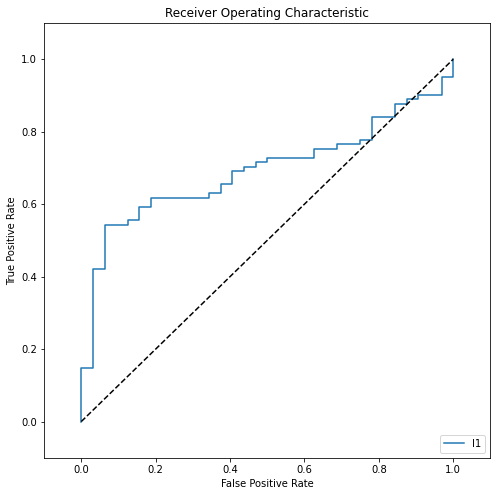

In [44]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
# Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

0.5380781212556913


In [46]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.6940586419753086


## Model-2 KNN

In [47]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

#  10-fold cross validation , 9 datapoints will be considered for training and 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 17.


In [48]:
MSE.index(min(MSE))

8

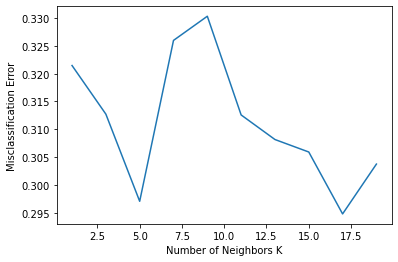

In [49]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [50]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [51]:
y_pred = classifier.predict(X_test)


In [52]:
y_train_pred = classifier.predict(X_train)

In [53]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
acc

69.91150442477876

In [54]:
cnf=confusion_matrix(y_test,y_pred).T
cnf

array([[ 4,  6],
       [28, 75]], dtype=int64)

In [55]:
# Get just the prediction for the positive class (1)
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [56]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.76470588, 0.64705882, 0.94117647, 0.64705882, 0.41176471,
       1.        , 0.41176471, 0.52941176, 0.64705882, 0.52941176])

In [57]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

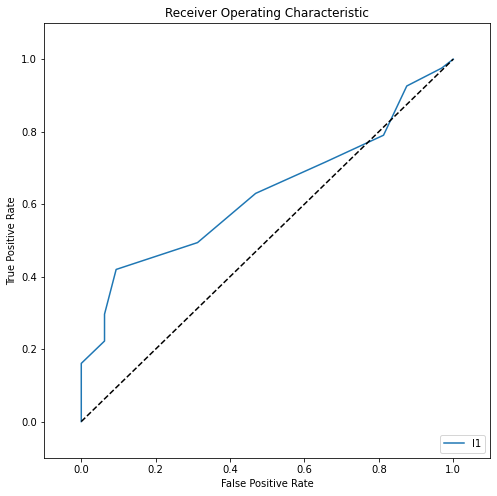

In [58]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.6376947040498442

In [60]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.6282793209876544


## Model 3- Neural Networks

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [62]:
# Neural Networks# Neural 
neural = MLPClassifier(hidden_layer_sizes=40,
                     activation='relu',
                     solver='adam',
                     alpha=0.001,
                     batch_size='auto',
                     max_iter=200,
                     random_state=137,
                     tol=0.0001,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     learning_rate='constant',
                     power_t=0.5,
                     momentum=0.8,
                     nesterovs_momentum=True,
                     shuffle=True,
                     learning_rate_init=0.001)
neural.fit(X_train, y_train)
#Predict Output
predicted = neural.predict(X_test)

neural_score = round(neural.score(X_train, y_train) * 100, 2)
neural_score_test = round(neural.score(X_test, y_test) * 100, 2)
print('Neural Score: \n', neural_score)
print('Neural Test Score: \n', neural_score_test)
print('Accuracy: \n', accuracy_score(y_test, predicted))
print(confusion_matrix(predicted,y_test))
print(classification_report(y_test,predicted))

Neural Score: 
 77.83
Neural Test Score: 
 69.91
Accuracy: 
 0.6991150442477876
[[ 5  7]
 [27 74]]
              precision    recall  f1-score   support

           0       0.42      0.16      0.23        32
           1       0.73      0.91      0.81        81

    accuracy                           0.70       113
   macro avg       0.57      0.53      0.52       113
weighted avg       0.64      0.70      0.65       113



In [63]:
## Predict Train results
y_train_pred = neural.predict(X_train)

In [64]:
## Predict Test results
y_pred = neural.predict(X_test)

In [65]:
y_pred_proba = neural.predict_proba(X_test)[:,1]

In [66]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

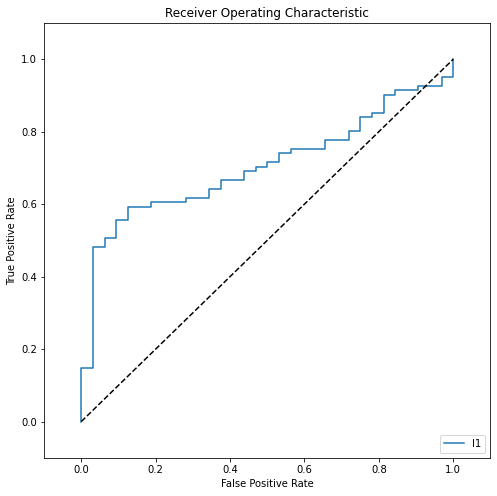

In [67]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
roc_auc_score(y_train,y_train_pred )

0.6703091301222142

In [69]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.7060185185185185


In [70]:
datan=[20,1,0.6,0.2,202,12,13,6.1,3,0.9]

In [71]:
nonl = np.asarray(datan)

In [72]:
nonl = (nonl - train_mean) / train_std

In [73]:
print(nonl)

Age                          -1.488212
Gender                        1.668451
Total_Bilirubin              -0.430493
Direct_Bilirubin             -0.465814
Alkaline_Phosphotase         -0.358277
Alamine_Aminotransferase     -0.382286
Aspartate_Aminotransferase   -0.469597
Total_Protiens               -0.376935
Albumin                      -0.216708
Albumin_and_Globulin_Ratio   -0.190916
dtype: float64


In [74]:
npre=neural.predict([nonl])

In [75]:
npre

array([0], dtype=int64)

In [76]:
datal=[52,0,0.8,0.2,245,48,49,6.4,3.2,1]

In [77]:
liv = np.asarray(datal)

In [78]:
liv = (liv - train_mean) / train_std

In [79]:
npre1=neural.predict([liv])

In [80]:
print(npre1)

[1]


In [1]:
# import openpyxl and tkinter modules 
from openpyxl import *
from tkinter import *

# globally declare wb and sheet variable 

# opening the existing excel file 
wb = load_workbook('C:\\Users\\poojabhala\\Downloads\\LiverDiseaseDetection-master\\LiverDiseaseDetection-master\\liver_data.xlsx') 

# create the sheet object 
sheet = wb.active 

def excel(): 

# resize the width of columns in 
# excel spreadsheet 
    sheet.column_dimensions['A'].width = 30
    sheet.column_dimensions['B'].width = 30
    sheet.column_dimensions['C'].width = 30
    sheet.column_dimensions['D'].width = 30
    sheet.column_dimensions['E'].width = 30
    sheet.column_dimensions['F'].width = 40
    sheet.column_dimensions['G'].width = 40
    sheet.column_dimensions['H'].width = 40
    sheet.column_dimensions['I'].width = 30
    sheet.column_dimensions['J'].width = 40
    sheet.column_dimensions['K'].width = 40
    sheet.column_dimensions['L'].width = 50
# write given data to an excel spreadsheet 
# at particular location 
    sheet.cell(row=1, column=1).value = "Name"
    sheet.cell(row=1, column=2).value = "Age"
    sheet.cell(row=1, column=3).value = "Gender"
    sheet.cell(row=1, column=4).value = "Total Bilirubin"
    sheet.cell(row=1, column=5).value = "Direct Bilirubin"
    sheet.cell(row=1, column=6).value = "Alkaline Phosphotase"
    sheet.cell(row=1, column=7).value = "Alamine Aminotransferase"
    sheet.cell(row=1, column=8).value = "Aspartate Aminotransferase"
    sheet.cell(row=1, column=9).value = "Total Protiens"
    sheet.cell(row=1, column=10).value = "Albumin"
    sheet.cell(row=1, column=11).value = "Albumin and Globulin Ratio"
    sheet.cell(row=1, column=12).value = "Disease Detected"
# Function to set focus (cursor) 
def focus1(event): 
    # set focus on the name_field box 
    name_field.focus_set() 
    
def focus2(event): 
    # set focus on the age_field box 
    age_field.focus_set() 


# Function to set focus 
def focus3(event): 
    # set focus on the gender_field box 
    gender_field.focus_set() 


# Function to set focus 
def focus4(event): 
    # set focus on the total_bilirubin_field box 
    total_bilirubin_field.focus_set() 


# Function to set focus 
def focus5(event): 
    # set focus on the direct_bilirubin_field box 
    direct_bilirubin_field.focus_set() 


# Function to set focus 
def focus6(event): 
    # set focus on the alkaline_phosphotase_field box 
    alkaline_phosphotase_field.focus_set() 


# Function to set focus 
def focus7(event): 
    # set focus on the alamine_aminotransferase_field box 
    alamine_aminotransferase_field.focus_set() 


# Function to set focus 
def focus8(event): 
    # set focus on the aspartate_aminotransferase_field box 
    aspartate_aminotransferase_field.focus_set() 

# Function to set focus 
def focus9(event): 
    # set focus on the total_protiens_field box 
    total_protiens_field.focus_set() 

# Function to set focus 
def focus10(event): 
    # set focus on the albumin_field box 
    albumin_field.focus_set() 

#Albumin and Globulin Ratio
def focus11(event): 
    # set focus on the albumin_globulin_ratio_field box 
    albumin_globulin_ratio_field.focus_set() 

# Function for clearing the 
# contents of text entry boxes 
def clear(): 
    
    # clear the content of text entry box 
    name_field.delete(0, END) 
    age_field.delete(0, END) 
    gender_field.delete(0, END) 
    total_bilirubin_field.delete(0, END) 
    direct_bilirubin_field.delete(0, END) 
    alkaline_phosphotase_field.delete(0, END) 
    alamine_aminotransferase_field.delete(0, END) 
    aspartate_aminotransferase_field.delete(0, END) 
    total_protiens_field.delete(0, END) 
    albumin_field.delete(0, END) 
    albumin_globulin_ratio_field.delete(0, END)

# Function to take data from GUI 
# window and write to an excel file 
def insert(): 
    
    # if user not fill any entry 
    # then print "empty input" 
    if (name_field.get() == "" or age_field.get() == "" or gender_field.get() == "" or total_bilirubin_field.get() == "" or direct_bilirubin_field.get() == "" or alkaline_phosphotase_field.get() == "" or alamine_aminotransferase_field.get() == "" or aspartate_aminotransferase_field.get() == "" or total_protiens_field.get() == "" or albumin_field.get() == "" or albumin_globulin_ratio_field.get()== ""):
        print("Empty Input Fields") 
        results['text']='Please Enter All The Input Fields'

    else: 

        # assigning the max row and max column 
        # value upto which data is written 
        # in an excel sheet to the variable 
        current_row = sheet.max_row 
        current_column = sheet.max_column 

        # get method returns current text 
        # as string which we write into 
        # excel spreadsheet at particular location 
        na1=name_field.get()
        ag2=int(age_field.get())
        ge3=gender_field.get().lower()
        if ge3=='male':
            gen3=0
        else:
            gen3=1
        tb4=float(total_bilirubin_field.get())
        db5=float(direct_bilirubin_field.get())
        ap6=float(alkaline_phosphotase_field.get())
        aa7=float(alamine_aminotransferase_field.get())
        aa8=float(aspartate_aminotransferase_field.get())
        tp9=float(total_protiens_field.get())
        af10=float(albumin_field.get())
        ag11=float(albumin_globulin_ratio_field.get())
        
        datas=[ag2,gen3,tb4,db5,ap6,aa7,aa8,tp9,af10,ag11]
        adatas = np.asarray(datas)
        adatas = (adatas - train_mean) / train_std
        npre=neural.predict([adatas])

        if npre==0:
            res="NO"
            results['text']=na1+" dosen't have Liver Disease"
        else:
            res="YES"
            results['text']=na1+" have Liver Disease"
            
        sheet.cell(row=current_row + 1, column=1).value = na1 
        sheet.cell(row=current_row + 1, column=2).value = ag2
        sheet.cell(row=current_row + 1, column=3).value = ge3
        sheet.cell(row=current_row + 1, column=4).value = tb4
        sheet.cell(row=current_row + 1, column=5).value = db5 
        sheet.cell(row=current_row + 1, column=6).value = ap6
        sheet.cell(row=current_row + 1, column=7).value = aa7
        sheet.cell(row=current_row + 1, column=8).value = aa8
        sheet.cell(row=current_row + 1, column=9).value = tp9
        sheet.cell(row=current_row + 1, column=10).value = af10
        sheet.cell(row=current_row + 1, column=11).value = ag11
        
        sheet.cell(row=current_row + 1, column=12).value = res
        # save the file 
        wb.save('C:\\Users\\poojabhala\\Downloads\\LiverDiseaseDetection-master\\LiverDiseaseDetection-master\\output.xlsx') 

        # set focus on the name_field box 
        name_field.focus_set() 

        # call the clear() function 
        #clear() 


# Driver code 
if __name__ == "__main__": 

    # create a GUI window 
    root = Tk() 

    # set the background colour of GUI window 
    root.configure(background='light green') 

    # set the title of GUI window 
    root.title("LIVER DISEASE DETECTION") 

    # set the configuration of GUI window 
    root.geometry("350x350") 

    excel() 

    # create a Form label 
    heading = Label(root, text="LIVER DISEASE DETECTION",font=('Cambria',12, 'bold'), bg="light green") 
    s1=Label(root, text="", bg="light green") 
    # create a Name label 
    name = Label(root, text="Name", bg="light green") 

    # create a age label 
    age = Label(root, text="Age", bg="light green") 

    # create a genderester label 
    gender = Label(root, text="Gender", bg="light green") 

    # create a Form No. lable 
    total_bilirubin = Label(root, text="Total Bilirubin", bg="light green") 

    # create a Contact No. label 
    direct_bilirubin = Label(root, text="Direct Bilirubin", bg="light green") 

    # create a Email id label 
    alkaline_phosphotase = Label(root, text="Alkaline Phosphotase", bg="light green") 

    # create a alamine_aminotransferase label 
    alamine_aminotransferase = Label(root, text="Alamine Aminotransferase", bg="light green") 

    # create a alamine_aminotransferase label 
    aspartate_aminotransferase = Label(root, text="Aspartate Aminotransferase", bg="light green") 
    
    # create a alamine_aminotransferase label 
    total_protiens = Label(root, text="Total Protiens", bg="light green") 
    
    # create a alamine_aminotransferase label 
    albumin = Label(root, text="Albumin", bg="light green") 
    
    # create a alamine_aminotransferase label 
    albumin_globulin_ratio = Label(root, text="Albumin Globulin Ratio", bg="light green") 
    
    results = Label(root, text="",foreground='red', font=('Calibri',12, 'bold'), bg="light green") 
    
    # grid method is used for placing 
    # the widgets at respective positions 
    # in table like structure . 
    heading.place(x=75,y=0)
    s1.grid(row=0, column=0)
    name.grid(row=1, column=0) 
    age.grid(row=2, column=0) 
    gender.grid(row=3, column=0) 
    total_bilirubin.grid(row=4, column=0) 
    direct_bilirubin.grid(row=5, column=0) 
    alkaline_phosphotase.grid(row=6, column=0) 
    alamine_aminotransferase.grid(row=7, column=0)
    aspartate_aminotransferase.grid(row=8, column=0)
    total_protiens.grid(row=9, column=0)
    albumin.grid(row=10, column=0)
    albumin_globulin_ratio.grid(row=11, column=0)
    results.place(x=60,y=305) 

    # create a text entry box 
    # for typing the information 
    name_field = Entry(root) 
    age_field = Entry(root) 
    gender_field = Entry(root) 
    total_bilirubin_field = Entry(root) 
    direct_bilirubin_field = Entry(root) 
    alkaline_phosphotase_field = Entry(root) 
    alamine_aminotransferase_field = Entry(root) 
    aspartate_aminotransferase_field = Entry(root)
    total_protiens_field = Entry(root)
    albumin_field = Entry(root)
    albumin_globulin_ratio_field = Entry(root)
    
    # bind method of widget is used for 
    # the binding the function with the events 

    # whenever the enter key is pressed 
    # then call the focus1 function 
    name_field.bind("<Return>", focus1) 

    # whenever the enter key is pressed 
    # then call the focus2 function 
    age_field.bind("<Return>", focus2) 

    # whenever the enter key is pressed 
    # then call the focus3 function 
    gender_field.bind("<Return>", focus3) 

    # whenever the enter key is pressed 
    # then call the focus4 function 
    total_bilirubin_field.bind("<Return>", focus4) 

    # whenever the enter key is pressed 
    # then call the focus5 function 
    direct_bilirubin_field.bind("<Return>", focus5) 

    # whenever the enter key is pressed 
    # then call the focus6 function 
    alkaline_phosphotase_field.bind("<Return>", focus6)

    # whenever the enter key is pressed 
    # then call the focus7 function 
    alamine_aminotransferase_field.bind("<Return>", focus7)

    # whenever the enter key is pressed 
    # then call the focus7 function 
    aspartate_aminotransferase_field.bind("<Return>", focus8)

    # whenever the enter key is pressed 
    # then call the focus8 function 
    total_protiens_field.bind("<Return>", focus9)

    # whenever the enter key is pressed 
    # then call the focus8 function 
    albumin_field.bind("<Return>", focus10)

    # whenever the enter key is pressed 
    # then call the focus8 function 
    albumin_globulin_ratio_field.bind("<Return>", focus11)

    # grid method is used for placing 
    # the widgets at respective positions 
    # in table like structure . 
    name_field.grid(row=1, column=1, ipadx="20") 
    age_field.grid(row=2, column=1, ipadx="20") 
    gender_field.grid(row=3, column=1, ipadx="20") 
    total_bilirubin_field.grid(row=4, column=1, ipadx="20") 
    direct_bilirubin_field.grid(row=5, column=1, ipadx="20") 
    alkaline_phosphotase_field.grid(row=6, column=1, ipadx="20") 
    alamine_aminotransferase_field.grid(row=7, column=1, ipadx="20") 
    aspartate_aminotransferase_field.grid(row=8, column=1, ipadx="20") 
    total_protiens_field.grid(row=9, column=1, ipadx="20") 
    albumin_field.grid(row=10, column=1, ipadx="20") 
    albumin_globulin_ratio_field.grid(row=11, column=1, ipadx="20") 
    # call excel function 
    excel() 

    # create a Submit Button and place into the root window 
    submit = Button(root, text="DETECT", fg="Black", bg="Red", command=insert) 
    submit.place(x=150,y=265) 

    # start the GUI 
    root.mainloop() 
